# Assignment 9
#### Due November 18, 2020, 23:59
In this week's assignment, you will model a problem as an undirected graph and use a minimum spanning tree, MST, algorithm to solve the problem efficiently. Namely, you will be studying the infrastructure of the fictional Kingdom of Gondor, and decide how to rebuild their road network using NetworkX.  
This problem could be approached in many ways, however, this serves as a classic example of how easily things may be perceived as graphs, and how we can use well-known algorithms to efficiently solve problems using graphs.

The data is given as two files: `edges.csv` and `nodes.csv`. These two files together represent 18 regions and the roads that connected them in the Kingdom of Gondor from J.R.R. Tolkien's *Lord of the Rings*.

- `nodes.csv` provides a mapping from node IDs to their labels through two columns, with each row representing a node:
    0. Node ID
    1. Node label


- `edges.csv` contains an edge list with each row representing an edge, and each edge has three values associated: 
    0. Node ID for one end of the edge
    1. Node ID for the other end of the edge
    2. Edge weight

## Submission
Edit and turn in this jupyter notebook file containing your solutions to each task.  
- Implement your solution to each of the exercises in the code field below the exercise description.  
- Make sure that we can run your code by placing the `data` folder in the same directory as your notebook.

The libraries you may need are already given, any extra imports are not allowed.

___

### The roads of Gondor
The Kingdom of Gondor has fallen victim to Saurons rage during the War of the Ring. Sauron and his minions have destroyed much of Gondor, including all of its roads. Now, against all odds, Sauron has been defeated, bringing the end of the Third Age and finally bringing peace back to Gondor.  
In this assignment, we will seek to restore the road network of Gondor by deciding which roads should be rebuilt first. Doing so will allow the regions of Gondor to yet again trade and travel with one another.

The network provided in the `data` folder represents Gondor's infrastructure **before** the cataclysmic event, the edges are roads and the nodes are regions. You can assume that after the cataclysmic event, none of the roads exist anymore. Your job is to make a minimally spanning tree based on the original road network, and use that to decide which roads to rebuild. The edge weights represent the importance of a given road for trade and travel.
___

## Assignment

In [103]:
import networkx as nx
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore", category=UserWarning) # removes a deprecation warning for nx.draw()

### Exercise 1
Use NetworkX to construct an undirected graph, `G`, from the two csv-files as to represent the original road network. As you build the graph, the node labels should be added as node attributes and the edge weights should be added as edge attributes.
___
`G.size()`  
\>\> `153`

`G.nodes[0]`  
\>\> `{'label': 'Ithilien'}`

`G.edges[(0,1)]`  
\>\> `{'weight': 0.461393}`

In [104]:
# Your solution to exercise 1 here
def newGraph(nodes,edges):
    G = nx.Graph()
    with open(nodes, 'r') as f:
        data = f.readlines()
        for i in data:
            node,attribute = i.strip().split(',')
            G.add_node(int(node), label = attribute)
            
    with open(edges, 'r') as f:
        data = f.readlines()
        for i in data:
            node1,node2,attribute = i.strip().split(',')
            G.add_edge(int(node1),int(node2), weight = float(attribute))
    return G

G = newGraph('data/nodes.csv','data/edges.csv')
print(G.size())
print(G.nodes[0])
print(G.edges[(0,1)])

# G.add_node(1, time='5pm')
# G.add_nodes_from([3], time='2pm')
# G.nodes[1]

# G.nodes[1]['room'] = 714
#G.nodes.data()



153
{'label': 'Ithilien'}
{'weight': 0.461393}


### Exercise 2

Use the [NetworkX implementation of Kruskal's MST algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.tree.mst.minimum_spanning_tree.html) to find the minimum spanning tree graph of `G`, let's call it `H`. Note that the algorithm makes use of the edge weights to compute the MST.  
This gives us the road network which reconnects all the regions by rebuilding as few roads as possible. Clever and efficient!

Report:
- the list of all edges/roads which are built in the MST
- the edge count in the MST graph
- the list of all edges/roads which are not rebuilt in the MST but were present in the old network
- the number of edges/roads which are not rebuilt in the MST but were present in the old network

___

 `Roads built in MST: [(0, 16), (0, 11), (1, 9), ... , (15, 16)]`  
 `Number of roads built in MST: 17` 

`Roads not rebuilt in MST: [(0, 1), (0, 2), (0, 3), ... , (15, 17), (16, 17)]`  
`Number of roads not rebuilt in MST: 136`

In [105]:
# Your solution to exercise 2 here
H = nx.minimum_spanning_tree(G, weight='weight', algorithm='kruskal', ignore_nan=False)

print('Roads built in MST:',H.edges())
print('Number of roads built in MST:', len(H.edges()))

print('Roads not rebuilt in MST:',[i for i in G.edges() if i not in H.edges()])
print('Number of roads not rebuilt in MST:', len([i for i in G.edges() if i not in H.edges()]))

Roads built in MST: [(0, 16), (0, 11), (1, 9), (2, 6), (2, 7), (3, 6), (4, 8), (4, 6), (5, 10), (5, 17), (6, 10), (8, 9), (9, 16), (12, 15), (13, 16), (14, 16), (15, 16)]
Number of roads built in MST: 17
Roads not rebuilt in MST: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 12), (0, 13), (0, 14), (0, 15), (0, 17), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (3, 4), (3, 5), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (4, 5), (4, 7), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (6, 7), (6, 8), (6, 9), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (7, 8), (7, 9), (7, 10

### Exercise 3
Make two visualizations/plots. One of the original graph, `G`, and one of the MST graph, `H`, both with titles.

Nodes should be visualized with their labels and not identifiers.

___

<img src="img/plot.png" align="center" width="700">

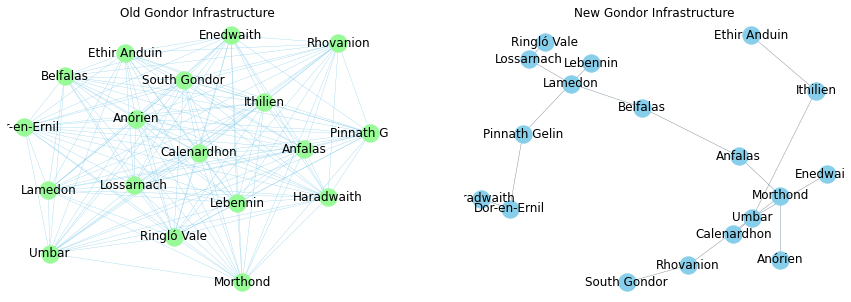

In [154]:
# Your solution to exercise 3 here
#nx.draw(G)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5),)

# axes = fig.add_axes([0,0,1,1])
# axes.set_title('Random graph')

labels = nx.get_node_attributes(G, 'label') 
ax1.set_title('Old Gondor Infrastructure')
ax2.set_title('New Gondor Infrastructure')

nx.draw(G,labels=labels,with_labels=True, node_color='palegreen', ax=ax1,edge_color='skyblue', width=0.3)
nx.draw(H,labels=labels,with_labels=True, node_color='skyblue', ax=ax2,edge_color='slategray', width=0.4)
